<a href="https://colab.research.google.com/github/jeenathampi/cmpe255/blob/master/DataMiningPreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict the possibility of a booking

# Load the necessary libraries

In [147]:
import pandas as pd
import numpy as np
import seaborn as sb

# Read the dataset which exported from open refine after performing refine operations

In [148]:
df = pd.read_csv("https://kmeanscluster.s3.amazonaws.com/hotel_bookings+(1).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117413 entries, 0 to 117412
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           117413 non-null  object 
 1   is_canceled                     117413 non-null  int64  
 2   lead_time                       117413 non-null  int64  
 3   arrival_date_year               117413 non-null  int64  
 4   arrival_date_month              117413 non-null  object 
 5   arrival_date_week_number        117413 non-null  int64  
 6   arrival_date_day_of_month       117413 non-null  int64  
 7   stays_in_weekend_nights         117413 non-null  int64  
 8   stays_in_week_nights            117413 non-null  int64  
 9   adults                          117413 non-null  int64  
 10  children                        117409 non-null  float64
 11  babies                          117413 non-null  int64  
 12  meal            

In [149]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02T00:00:00Z
1,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02T00:00:00Z
2,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03T00:00:00Z
3,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03T00:00:00Z
4,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03T00:00:00Z


As we can see here from above we have null values in the dataset

In [150]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          478
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             16
stays_in_week_nights                31
adults                               5
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
agent                              332
company                            343
days_in_waiting_list     

In [151]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,117413.000000,117413.000000,117413.000000,117413.000000,117413.000000,117413.000000,117413.000000,117413.000000,117409.000000,117413.000000,117413.000000,117413.000000,117413.000000,117413.000000,102024.000000,6378.000000,117413.000000,117413.000000,117413.000000,117413.000000
mean,0.374805,105.091864,2016.160280,27.139772,15.803156,0.936259,2.521109,1.860739,0.104524,0.007870,0.027867,0.086958,0.125276,0.216339,86.521652,194.185168,2.337782,103.545674,0.062634,0.571095
std,0.484075,106.912068,0.706605,13.574323,8.783358,0.995206,1.892516,0.482021,0.399723,0.097175,0.164594,0.848747,1.446076,0.632516,110.696738,130.886941,17.677876,49.186788,0.245551,0.791674
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,1.290000,0.000000,0.000000
25%,0.000000,19.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,67.000000,0.000000,70.530000,0.000000,0.000000
50%,0.000000,71.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,195.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,162.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,274.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,709.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


# Data Preprocessing and Visualization

Checking the sum of null/NaN values in the dataset

In [152]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              467
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              15389
company         

In [153]:
df.isnull().any()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                           True
babies                            False
meal                              False
country                            True
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                              True
company                            True


In [154]:
df.isnull().all()

hotel                             False
is_canceled                       False
lead_time                         False
arrival_date_year                 False
arrival_date_month                False
arrival_date_week_number          False
arrival_date_day_of_month         False
stays_in_weekend_nights           False
stays_in_week_nights              False
adults                            False
children                          False
babies                            False
meal                              False
country                           False
market_segment                    False
distribution_channel              False
is_repeated_guest                 False
previous_cancellations            False
previous_bookings_not_canceled    False
reserved_room_type                False
assigned_room_type                False
booking_changes                   False
deposit_type                      False
agent                             False
company                           False


The below histogram shows the column groups grapph with x-axis as the column value ranges and y-axis as the frequencies

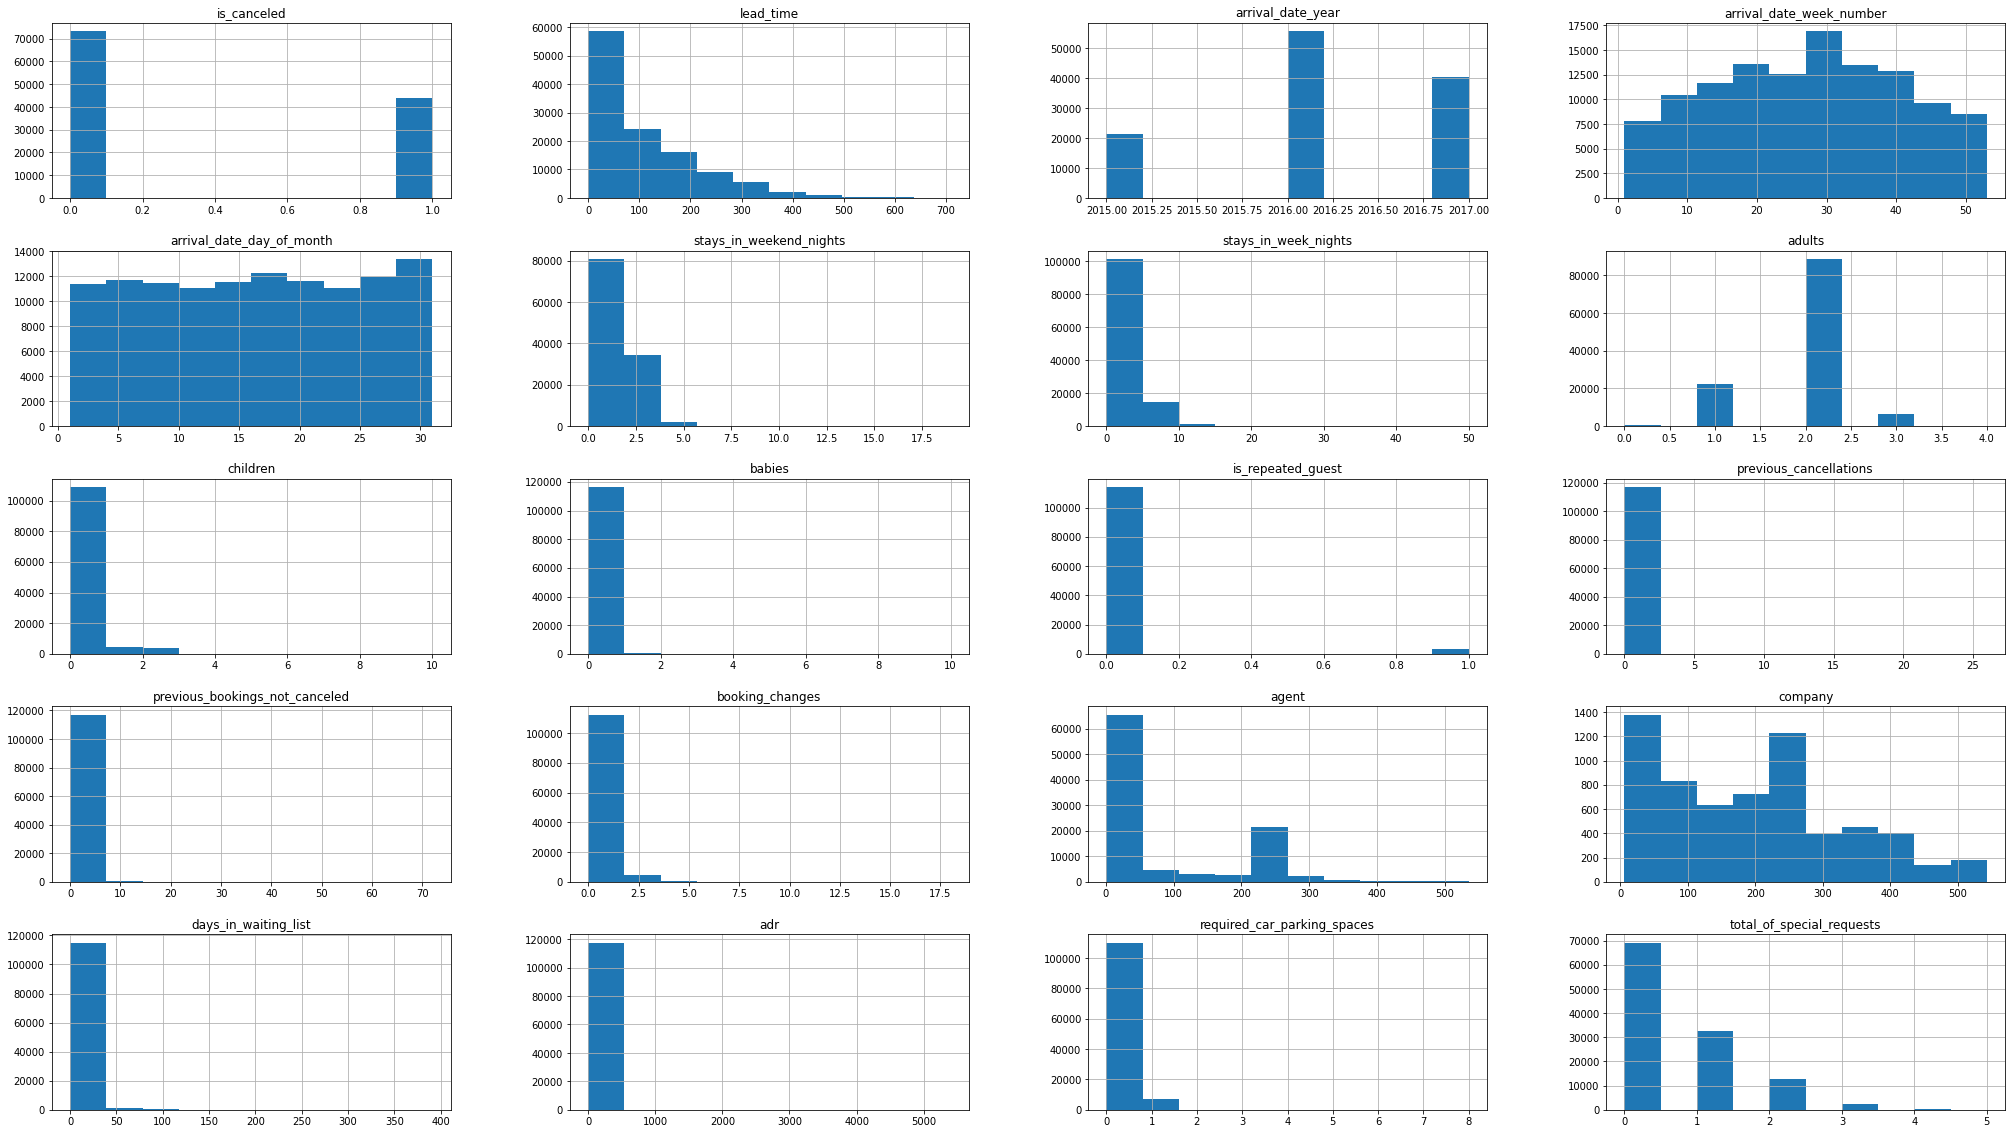

In [155]:
df.hist(figsize=(35,20))
plt.show()

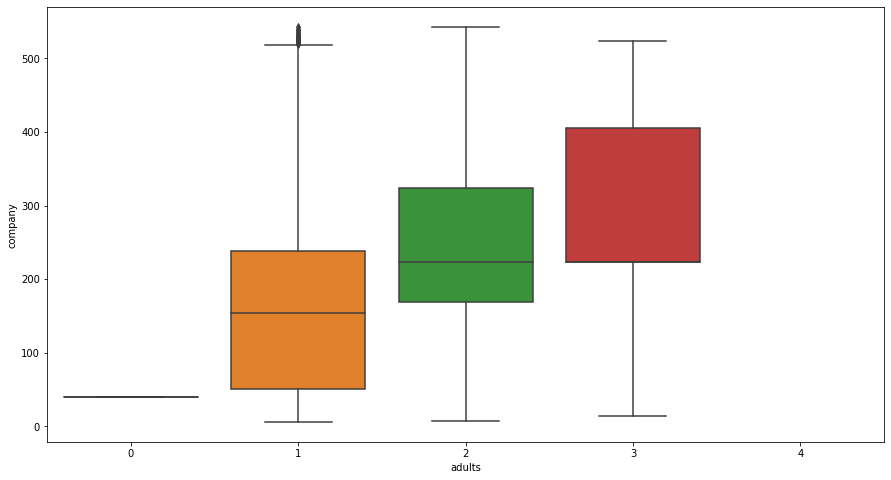

In [156]:
plt.figure(figsize=(15, 8))
sb.boxplot(x='adults',y='company',data=df)

In [157]:
import plotly.express as px
no_of_customers_by_country = df['country'].value_counts().to_frame()
no_of_customers_by_country.columns = ['count']
fig = px.choropleth(no_of_customers_by_country, color='count',
                    locations=no_of_customers_by_country.index,
                    hover_name=no_of_customers_by_country.index,
                    color_continuous_scale=px.colors.sequential.Burg)
fig.update_traces(marker=dict(line=dict(color='#000000', width=1)))
fig.update_layout(title_text='Number of Records by Countries',
                  title_x=0.5, title_font=dict(size=22))  # Location and the font size of the main title
fig.show()

From the above map it is clear that portugese has most number of customers - 47k

In [158]:
fig = px.histogram(df, x="market_segment", color='hotel')
fig.update_layout(barmode='group', xaxis={'categoryorder': 'total descending'})
fig.update_traces(marker=dict(line=dict(color='#000000')))
fig.update_layout(title_text='Distribution of Market Segment by different Hotel Types',
                  title_x=0.5, title_font=dict(size=20))  # Location and the font size of the main title
fig.show()

In [159]:
import plotly.graph_objects as go
reservation_status = df['reservation_status'].value_counts()
fig = go.Figure(data=[go.Pie(labels=reservation_status.index, values=reservation_status, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Reservation Status', title_x=0.5, title_font=dict(size=32))
fig.show()

Correlation graph

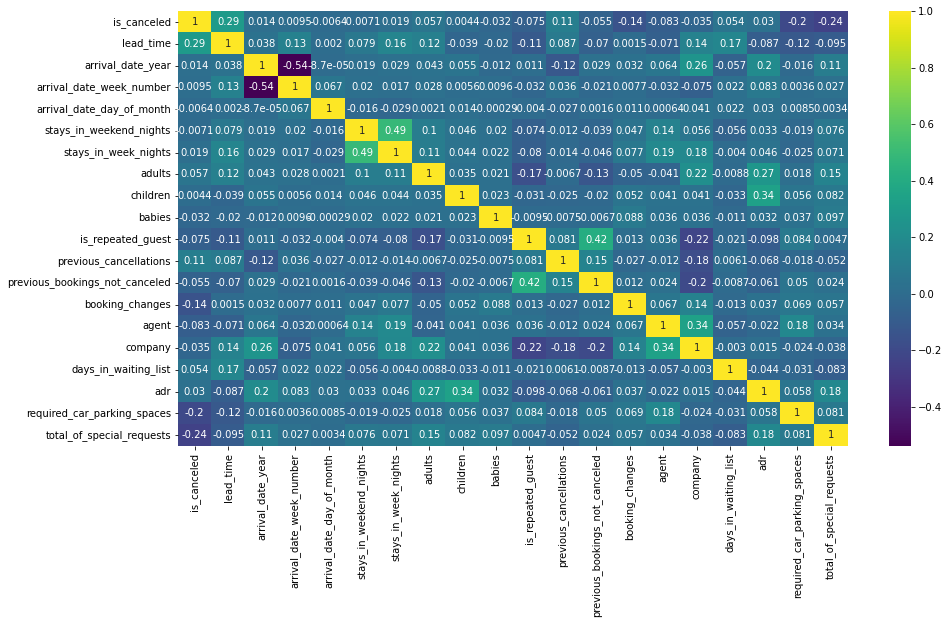

In [160]:
plt.figure(figsize=(15, 8))
sb.heatmap(df.corr(), annot = True, cmap = 'viridis')

Dropped the columns with null values

In [161]:
df=df.drop(['country','agent','company'],axis=1)

In [162]:
df=df.dropna()

In [163]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status          

In [164]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

One hot encoding using labelEncoder library
- Will be converting the string to encoded numerical labels

In [165]:
list_1=list(df.columns)
list_1

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [166]:
headings=[]
for i in list_1:
    if df[i].dtype=='object':
        headings.append(i)

In [167]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [168]:
for i in headings:
    df[i]=le.fit_transform(df[i])
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,7,2015,5,27,1,0,1,1,0.0,0,0,3,1,0,0,0,0,2,0,0,0,2,75.00,0,0,1,120
1,1,0,13,2015,5,27,1,0,1,1,0.0,0,0,2,0,0,0,0,0,0,0,0,0,2,75.00,0,0,1,120
2,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,98.00,0,1,1,121
3,1,0,14,2015,5,27,1,0,2,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,98.00,0,1,1,121
4,1,0,0,2015,5,27,1,0,2,2,0.0,0,0,3,1,0,0,0,2,2,0,0,0,2,107.00,0,0,1,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117408,0,0,23,2017,1,35,30,2,5,2,0.0,0,0,5,3,0,0,0,0,0,0,0,0,2,96.14,0,0,1,917
117409,0,0,102,2017,1,35,31,2,5,3,0.0,0,0,6,3,0,0,0,4,4,0,0,0,2,225.43,0,2,1,918
117410,0,0,34,2017,1,35,31,2,5,2,0.0,0,0,6,3,0,0,0,3,3,0,0,0,2,157.71,0,4,1,918
117411,0,0,109,2017,1,35,31,2,5,2,0.0,0,0,6,3,0,0,0,0,0,0,0,0,2,104.40,0,0,1,918


As seen in the above dataframe, all the columns with string values are encoded with numerical values

# Training the dataset using logistic regression

In [169]:
y=df['hotel']
x=df.drop('hotel',axis=1)

In [170]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=0.2)

In [171]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)  

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [172]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
y_pred_reg=reg.predict(x_test)
acc_reg = accuracy_score(y_test, y_pred_reg)
print(f"Accuracy Score of Logistic Regression is : {acc_reg}")

Accuracy Score of Logistic Regression is : 0.757686738778639
